# Imports

In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None

# Extraction

In [261]:
df_train = pd.read_csv('./datasets/z_train.csv')
df_target = pd.read_csv('./datasets/z_test.csv')

# Analysis

In [262]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11725 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15024 non-null  object 
 6   education_level         14957 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15276 non-null  object 
 9   company_size            10592 non-null  object 
 10  company_type            10435 non-null  object 
 11  last_new_job            14987 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [263]:
df_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3601
relevent_experience          0
enrolled_university        302
education_level            369
major_discipline          2237
experience                  50
company_size              4734
company_type              4891
last_new_job               339
training_hours               0
target                       0
dtype: int64

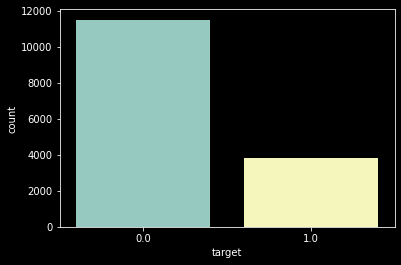

In [264]:
sns.countplot(data=df_train, x='target');

In [265]:
# analizamos el set de predicción
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             3832 non-null   int64  
 1   city                    3832 non-null   object 
 2   city_development_index  3832 non-null   float64
 3   gender                  2925 non-null   object 
 4   relevent_experience     3832 non-null   object 
 5   enrolled_university     3748 non-null   object 
 6   education_level         3741 non-null   object 
 7   major_discipline        3256 non-null   object 
 8   experience              3817 non-null   object 
 9   company_size            2628 non-null   object 
 10  company_type            2583 non-null   object 
 11  last_new_job            3748 non-null   object 
 12  training_hours          3832 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 389.3+ KB


In [266]:
df_target.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                     907
relevent_experience          0
enrolled_university         84
education_level             91
major_discipline           576
experience                  15
company_size              1204
company_type              1249
last_new_job                84
training_hours               0
dtype: int64

# Transformacion

In [267]:
df_t1 = df_train.copy()

In [268]:
# Eliminamos del set de entrenamiento las ciudades que no existen en el set objetivo
print(df_t1.shape)
drop_list = df_target.city.value_counts().index.tolist()
df_t1.drop(df_t1[~df_t1.city.isin(drop_list)].index, inplace = True)
print(df_t1.shape)

(15326, 14)
(15242, 14)


In [269]:
# Eliminamos del set de entrenamiento el indice de desarrollo que no existen en el set objetivo
print(df_t1.shape)
drop_list = df_target.city_development_index.value_counts().index.tolist()
df_t1.drop(df_t1[~df_t1.city_development_index.isin(drop_list)].index, inplace = True)
print(df_t1.shape)

(15242, 14)
(15242, 14)


In [270]:
# cambiamos los tipos de datos flotantes por enteros
df_t1.city_development_index = df_t1.city_development_index.astype('int64')

In [271]:
def transform_df(df):
    df = df.copy()
    # df.dropna(inplace=True)
    # df.dropna(subset=['experience'], inplace=True)
    df.enrolled_university = df.enrolled_university.fillna('no_enrollment')
    df.education_level = df.education_level.fillna('undefinded')
    df.last_new_job = df.last_new_job.fillna('undefinded')
    return df
    

In [272]:
df_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

# Carga set de entranamiento

In [273]:
# trasformamos el dataset
df_t2 = transform_df(df_t1)
# df_t2 = df_t2.copy()
# estructura del dataset despues de la Transformacion
print(df_t2.shape)
# filtramos las variables relevantes para el modelo
df_t3 = df_t2[['enrollee_id','city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours','target']]
# creamos el set con columnas dummy
df_t3_dummy = pd.get_dummies(data=df_t2, columns=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline', 'experience', 'company_size', 'company_type','last_new_job'])
print(df_t3_dummy.info())
# Generamos los sets a entrenar
X = df_t3_dummy.drop(['enrollee_id','target'], axis=1).to_numpy()
y = df_t3_dummy.target.to_numpy()
# generamos los sets de entreamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

(15242, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15242 entries, 0 to 15325
Columns: 179 entries, enrollee_id to last_new_job_undefinded
dtypes: float64(1), int64(3), uint8(175)
memory usage: 3.6 MB
None


In [274]:
# Escalamos las variables 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Modelo de Regresión Logistica

In [275]:
# Entrenamos el modelo de Regresión Logistica
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.7870089395554827

In [276]:
# Hacemos las predicciones con el set de pruebas
y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))
confusion_matrix(y_test, y_pred)

0.7795998688094458


array([[2086,  171],
       [ 501,  291]], dtype=int64)

In [277]:
df_target.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

# Carga set objetivo

In [278]:
# Cargamos el set de prediciones
# df_p1 = df_target.copy()
df_p1 = transform_df(df_target)
# filtramos las variables relevantes para el modelo
df_p2 = df_p1[['enrollee_id','city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline', 'experience', 'company_size', 'company_type','last_new_job','training_hours']]
# creamos el set con columnas dummy
df_p2_dummy = pd.get_dummies(data=df_p2, columns=['gender','city','relevent_experience','enrolled_university','education_level','major_discipline', 'experience', 'company_size', 'company_type','last_new_job'])
print(df_p2_dummy.info())

NameError: name 'transforma_df' is not defined

In [ ]:
# filtramos las columnas que existen en el set de predicción pero no en el de entrenamiento
# cols = df_p2_dummy.columns.values.tolist()
# cols_to_drop = ['education_level_High School','education_level_Primary School']
# cols_select = [col for col in df_p2_dummy if col not in cols_to_drop]
# df_p3 = df_p2_dummy[cols_select]

In [ ]:
# filtramos las columnas generedas por el proceso dummy de entrenamiento
col_temp = df_t3_dummy.columns.tolist()
col_list = [col for col in col_temp if col != 'enrollee_id' and col !='target']

## Modelo de Regresión Logistica

In [ ]:
# Generamos el set para predecir la variable dependiente
# X_p = df_p2_dummy.drop(['enrollee_id'], axis=1).to_numpy()
X_p = df_p2_dummy[col_list]
# Escalamos las variables del set de predicción
scaler = StandardScaler()
X_pred = scaler.fit_transform(X_p)
# Hacemos las predicciones con el dataset para submission
target_predictions = logreg.predict(X_pred)
# Agregamos las etiquetas de predicción al df
df_p1['target'] = target_predictions
# creamos el df de submission
df_submission = df_p1[['enrollee_id','target']]
df_submission.head(10)

,enrollee_id,target
0,23603,0.0
1,22499,0.0
2,10465,0.0
3,8293,0.0
4,4246,0.0
5,29306,0.0
6,23118,1.0
7,32832,0.0
8,13380,0.0
9,16102,0.0


In [ ]:
df_submission.target.value_counts()

0.0    3405
1.0     427
Name: target, dtype: int64

In [ ]:
# creamos el archivo csv para submission en el portal kaggle
df_submission.to_csv('./outputs/submission_15.csv', index=False)